# Loading Data

In [1]:
import pandas as pd
import numpy as np

# Read the data
df = pd.read_csv('/kaggle/input/cars-data/car_data.csv')

# Replace "Call for price" with NaN in the Price column
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Check the data types of columns
print(df.dtypes)

# Display the first few rows of the dataframe to verify the changes
print(df.head())

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Display the identified numerical and categorical columns
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Make                object
Model               object
Version             object
Price              float64
Make_Year            int64
CC                   int64
Assembly            object
Mileage              int64
Registered City     object
Transmission        object
dtype: object
         Make    Model                          Version      Price  Make_Year  \
0       Honda  Insight                              NaN  7400000.0       2019   
1  Mitsubishi   Minica                     Black Minica  1065000.0       2019   
2        Audi       A6  1.8 TFSI Business Class Edition  9300000.0       2015   
3      Toyota     Aqua                                G  2375000.0       2014   
4       Honda     City                       1.3 i-VTEC  2600000.0       2017   

     CC  Assembly  Mileage Registered City Transmission  
0  1500  Imported     2000   Un-Registered    Automatic  
1   660  Imported    68000          Lahore    Automatic  
2  1800     Local    70000          Lahore    Automatic

# Replace missing values

In [2]:
# Verify if missing values are handled
print(df.isnull().sum())

# Handle missing values for numerical columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Handle missing values for categorical columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify if missing values are handled
print(df.isnull().sum())


Make                  0
Model                 0
Version            6772
Price              1209
Make_Year             0
CC                    0
Assembly              0
Mileage               0
Registered City       0
Transmission          0
dtype: int64
Make               0
Model              0
Version            0
Price              0
Make_Year          0
CC                 0
Assembly           0
Mileage            0
Registered City    0
Transmission       0
dtype: int64


# Encoding categorical variables

In [3]:
from sklearn import preprocessing

# Initialize LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Encode labels for each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Display the encoded DataFrame
print(df.head())


   Make  Model  Version      Price  Make_Year    CC  Assembly  Mileage  \
0    25    170      675  7400000.0       2019  1500         0     2000   
1    43    214      306  1065000.0       2019   660         0    68000   
2     1     17       75  9300000.0       2015  1800         1    70000   
3    61     32      607  2375000.0       2014  1500         0    99900   
4    25     86       36  2600000.0       2017  1300         1    55000   

   Registered City  Transmission  
0              180             0  
1               97             0  
2               97             0  
3               66             0  
4               66             1  


# Feature Engineering: Add age column

In [4]:
# Import datetime module
import datetime

# Calculate current year
current_year = datetime.datetime.now().year

# Extract age of the car
df['Age'] = current_year - df['Make_Year']

# Drop 'Make_Year' column
df.drop(columns=['Make_Year'], inplace=True)

# Display the first few rows of the dataframe to verify the changes
print(df.head())


   Make  Model  Version      Price    CC  Assembly  Mileage  Registered City  \
0    25    170      675  7400000.0  1500         0     2000              180   
1    43    214      306  1065000.0   660         0    68000               97   
2     1     17       75  9300000.0  1800         1    70000               97   
3    61     32      607  2375000.0  1500         0    99900               66   
4    25     86       36  2600000.0  1300         1    55000               66   

   Transmission  Age  
0             0    5  
1             0    5  
2             0    9  
3             0   10  
4             1    7  


# Extract Relevant Features

In [5]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Get the absolute correlation coefficients with the target variable 'Price'
correlation_with_price = correlation_matrix['Price'].abs().sort_values(ascending=False)

# Select features with correlation coefficient above a certain threshold (e.g., 0.1)
relevant_features = correlation_with_price[correlation_with_price > 0.15].index.tolist()

# Display the relevant features
print("Relevant Features:")
print(relevant_features)


Relevant Features:
['Price', 'CC', 'Transmission', 'Age', 'Assembly', 'Registered City', 'Mileage']


In [6]:
# Select only the relevant features from the DataFrame
df_relevant = df[relevant_features]

# Display the DataFrame with relevant features
print(df_relevant.head())

       Price    CC  Transmission  Age  Assembly  Registered City  Mileage
0  7400000.0  1500             0    5         0              180     2000
1  1065000.0   660             0    5         0               97    68000
2  9300000.0  1800             0    9         1               97    70000
3  2375000.0  1500             0   10         0               66    99900
4  2600000.0  1300             1    7         1               66    55000


In [7]:
# Drop the 'Registered City' column from the DataFrame
df_relevant = df_relevant.drop(columns=['Registered City'])

# Display the DataFrame with relevant features after dropping 'Registered City'
print(df_relevant.head())


       Price    CC  Transmission  Age  Assembly  Mileage
0  7400000.0  1500             0    5         0     2000
1  1065000.0   660             0    5         0    68000
2  9300000.0  1800             0    9         1    70000
3  2375000.0  1500             0   10         0    99900
4  2600000.0  1300             1    7         1    55000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Split the data into features (X) and the target variable (y)
X = df_relevant.drop(columns=['Price'])
y = df_relevant['Price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scaling the Prices

In [9]:


# Convert 'Price' column to floating point (double) data type
print(max(y_train))
y_train = y_train/max(y_train)
y_test = y_test/max(y_test)


# Display the scaled numerical features and 'Price'
print(X_train)
print(X_test)
print(y_train)
print(y_test)




95000000.0
         CC  Transmission  Age  Assembly  Mileage
12577  1600             0    3         1       10
76866   800             1   17         1   150000
44717  1000             1    6         1    85000
68691  1300             1   12         1   123000
14944  1600             0    8         1    60000
...     ...           ...  ...       ...      ...
6265   1300             1    5         1    10000
54886  1600             1   11         1   120000
76820  1300             1   12         1   110000
860     800             1   13         0    12000
15795   660             0    5         0     7500

[64457 rows x 5 columns]
         CC  Transmission  Age  Assembly  Mileage
80268  2700             0    3         1       20
79446  1300             0   10         1   108000
64657  1300             1    8         1   107000
60803  1300             0    7         1    40000
1811    800             1    5         1    27000
...     ...           ...  ...       ...      ...
21146   800  

# Linear Regression Model

In [10]:

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0016174456399593723


# Decision Trees Model

In [11]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree model
dt_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_regressor.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)

print("Decision Tree - Mean Squared Error (MSE):", mse_dt)


Decision Tree - Mean Squared Error (MSE): 0.0010980893111215838


# Random Forest Model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Initialize Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Train the Random Forest model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.0009016243053665554


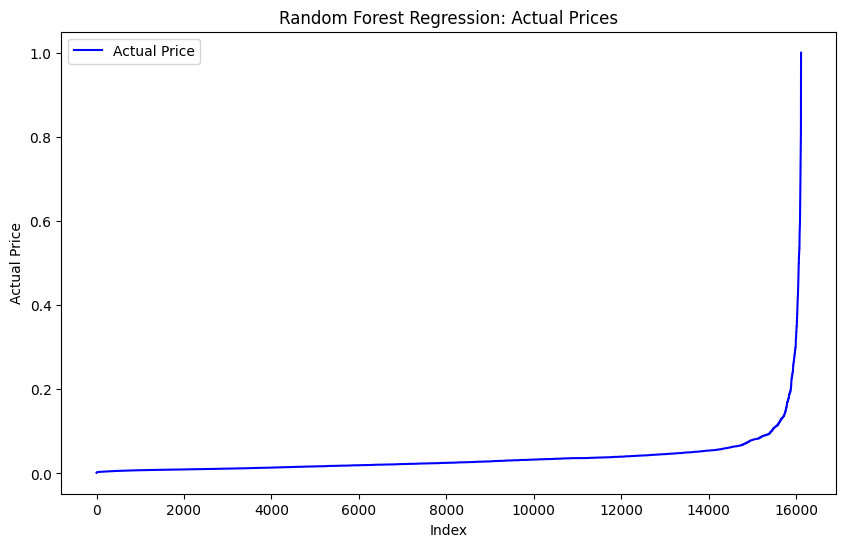

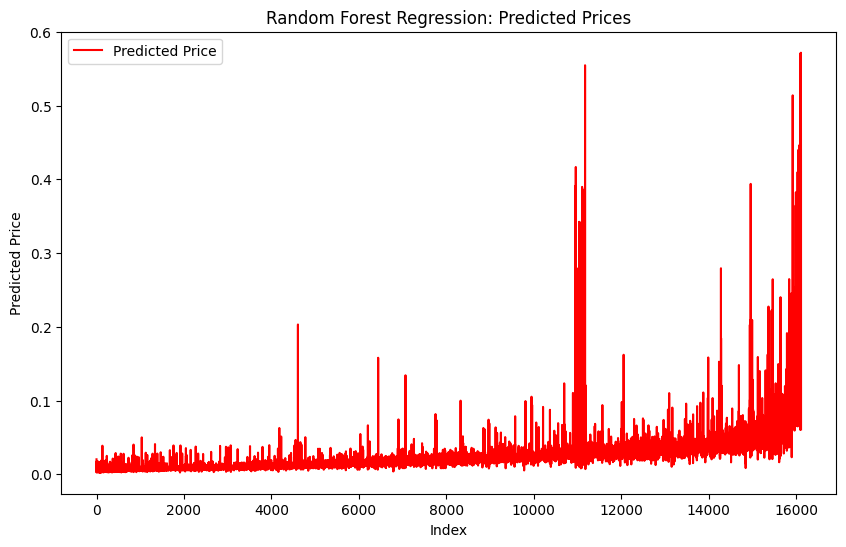

In [13]:
import matplotlib.pyplot as plt  # Importing pyplot from matplotlib

# Sort actual and predicted prices for Random Forest Regression
sorted_indices_rf = y_test.argsort()
y_test_sorted_rf = y_test.iloc[sorted_indices_rf].values
y_pred_sorted_rf = y_pred[sorted_indices_rf]

# Create an index for the sorted prices
index_rf = range(len(y_test_sorted_rf))

# Plot actual prices using a line graph
plt.figure(figsize=(10, 6))
plt.plot(index_rf, y_test_sorted_rf, label='Actual Price', color='blue')
plt.xlabel('Index')
plt.ylabel('Actual Price')
plt.title('Random Forest Regression: Actual Prices')
plt.legend()
plt.show()

# Plot predicted prices using a line graph
plt.figure(figsize=(10, 6))
plt.plot(index_rf, y_pred_sorted_rf, label='Predicted Price', color='red')
plt.xlabel('Index')
plt.ylabel('Predicted Price')
plt.title('Random Forest Regression: Predicted Prices')
plt.legend()
plt.show()


In [14]:
from joblib import dump

# Define the file path where you want to save the model
model_file_path = 'random_forest_model.joblib'

# Save the trained Random Forest model to the specified file path
dump(rf_regressor, model_file_path)

print("Random Forest model saved successfully!")


Random Forest model saved successfully!


# Prediction

**Example:** now let's take an example from the dataset to predict a value

**Make	Model	Version	Price	Make_Year	CC	Assembly	Mileage	Registered City	Transmission**

Honda	Insight		7400000	2019	1500	Imported	2000	Un-Registered	Automatic

In [15]:
# Define the input data
input_data = {
    'Make': ['Mitsubishi'],
    'Model': ['Minica'],
    'Version': ['Black Minica'],
    'Price': [1065000],
    'Make_Year': [2019],
    'CC': [660],
    'Assembly': ['Imported'],
    'Mileage': [68000],
    'Registered City': ['Lahore'],
    'Transmission': ['Automatic']
}

# Convert the input data into a DataFrame
input_df = pd.DataFrame(input_data)

# Set option to opt-in to future behavior
pd.set_option('future.no_silent_downcasting', True)

# Preprocess the input data
input_df['Transmission'] = input_df['Transmission'].replace({'Automatic': 0, 'Manual': 1}).infer_objects(copy=False)
input_df['Assembly'] = input_df['Assembly'].replace({'Imported': 0, 'Local': 1}).infer_objects(copy=False)
current_year = datetime.datetime.now().year
input_df['Age'] = current_year - input_df['Make_Year']
input_df.drop(['Make', 'Model', 'Version', 'Registered City', 'Make_Year', 'Price'], axis=1, inplace=True)

# Reorder the columns
input_df = input_df[['CC', 'Transmission', 'Age', 'Assembly', 'Mileage']]

# Predict the price using the trained model
predicted_price = rf_regressor.predict(input_df)

# Display the predicted price
print("Predicted Price:", predicted_price*95000000)


Predicted Price: [1337584.16666667]
